In [162]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression ,Lasso,Ridge
from sklearn.model_selection import cross_val_score,train_test_split,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [133]:
#read the data
house_data=pd.read_csv(r'C:\Users\jiten\Downloads\House-Price-Prediction-Step-by-Step-implementation-of-Machine-Learning-Project-main\House-Price-Prediction-Step-by-Step-implementation-of-Machine-Learning-Project-main\USA_Housing.csv')

In [134]:
house_data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [135]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [136]:
#check the null value
house_data.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [137]:
house_data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [138]:
#transform the value using minmaxscalar
min_max=MinMaxScaler(feature_range=(0,10))

In [139]:
for col in house_data.drop('Address',axis=1).columns:
    house_data[col]=min_max.fit_transform(np.array(house_data[col]).reshape(-1,1))

In [140]:
house_data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,6.868222,4.419858,5.015016,4.644444,3.299422,4.252103,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,6.835207,4.885384,4.645014,2.422222,5.759680,6.073686,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,4.837370,4.686090,7.013501,6.955556,5.285820,4.251917,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,5.066298,6.609563,3.124301,2.800000,4.915489,5.073843,USS Barnett\nFPO AP 44820
4,4.692232,3.485565,6.118507,4.955556,3.769883,2.507024,USNS Raymond\nFPO AE 09386


In [141]:
#check the correlation with target variable
house_data.drop('Address',axis=1).corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


In [142]:
#create a model
LR=LinearRegression()

In [143]:
#segregate x and y (target)
x=house_data.drop(['Address','Price'],axis=1)
y=house_data.Price

In [144]:
#checking the variance/overfitting
cross_val_score(LR,x,y,cv=10,scoring='r2',n_jobs=1)

array([0.91336093, 0.92112399, 0.91727189, 0.92360986, 0.91247623,
       0.91771186, 0.91672276, 0.92487908, 0.9212436 , 0.90539243])

In [179]:
#did the train test split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.1,random_state=12)

In [146]:
# fit the data into the algo
LR.fit(x_train,y_train)

LinearRegression()

In [147]:
# find the modle training score
LR.score(x_train,y_train)

0.9184704115644047

In [148]:
#find the score of actual value and predicted value
r2_score(LR.predict(x_test) , y_test)---0-1

-0.09655748928818175

In [149]:
mean_squared_error(LR.predict(x_test) , y_test)

0.1778312609984356

In [150]:
mean_absolute_error(LR.predict(x_test) , y_test)

0.3405634664737396

In [151]:
#find the coefficients of model
LR.coef_

array([0.79078113, 0.46353161, 0.37017641, 0.0021406 , 0.42912317])

In [152]:
x_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
4506,6.132280,7.465982,3.825179,1.022222,5.551610
1273,6.320612,7.036847,3.752991,3.155556,4.400909
357,6.040902,2.760817,4.978857,2.222222,4.292170
478,4.992890,4.965022,4.691946,0.377778,6.025467
356,4.964713,6.043375,7.128912,5.511111,6.327421
...,...,...,...,...,...
2157,7.188514,3.910501,3.272311,0.800000,5.881693
4526,5.769132,7.226229,3.601333,0.000000,5.304659
1151,3.240054,3.196971,2.588516,2.577778,7.724725
1502,6.118508,2.940035,5.136311,9.111111,4.420804


In [153]:

pred=x_test.copy(deep=True)
pred['actual']=y_test
pred['predicted']=LR.predict(x_test)

In [154]:
x_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
4506,6.132280,7.465982,3.825179,1.022222,5.551610
1273,6.320612,7.036847,3.752991,3.155556,4.400909
357,6.040902,2.760817,4.978857,2.222222,4.292170
478,4.992890,4.965022,4.691946,0.377778,6.025467
356,4.964713,6.043375,7.128912,5.511111,6.327421
...,...,...,...,...,...
2157,7.188514,3.910501,3.272311,0.800000,5.881693
4526,5.769132,7.226229,3.601333,0.000000,5.304659
1151,3.240054,3.196971,2.588516,2.577778,7.724725
1502,6.118508,2.940035,5.136311,9.111111,4.420804


In [155]:
pred

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,actual,predicted
4506,6.132280,7.465982,3.825179,1.022222,5.551610,6.612605,6.273253
1273,6.320612,7.036847,3.752991,3.155556,4.400909,5.181519,5.707317
357,6.040902,2.760817,4.978857,2.222222,4.292170,4.172548,3.909179
478,4.992890,4.965022,4.691946,0.377778,6.025467,4.115248,4.735792
356,4.964713,6.043375,7.128912,5.511111,6.327421,6.147160,6.256031
...,...,...,...,...,...,...,...
2157,7.188514,3.910501,3.272311,0.800000,5.881693,5.655466,5.396937
4526,5.769132,7.226229,3.601333,0.000000,5.304659,4.315750,5.683926
1151,3.240054,3.196971,2.588516,2.577778,7.724725,2.098652,2.485394
1502,6.118508,2.940035,5.136311,9.111111,4.420804,3.959915,4.181853


In [156]:
LR.coef_

array([0.79078113, 0.46353161, 0.37017641, 0.0021406 , 0.42912317])

In [157]:
LR.intercept_

-5.837260304076081

In [158]:
pred

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,actual,predicted
4506,6.132280,7.465982,3.825179,1.022222,5.551610,6.612605,6.273253
1273,6.320612,7.036847,3.752991,3.155556,4.400909,5.181519,5.707317
357,6.040902,2.760817,4.978857,2.222222,4.292170,4.172548,3.909179
478,4.992890,4.965022,4.691946,0.377778,6.025467,4.115248,4.735792
356,4.964713,6.043375,7.128912,5.511111,6.327421,6.147160,6.256031
...,...,...,...,...,...,...,...
2157,7.188514,3.910501,3.272311,0.800000,5.881693,5.655466,5.396937
4526,5.769132,7.226229,3.601333,0.000000,5.304659,4.315750,5.683926
1151,3.240054,3.196971,2.588516,2.577778,7.724725,2.098652,2.485394
1502,6.118508,2.940035,5.136311,9.111111,4.420804,3.959915,4.181853


In [159]:
LR.predict(x_test)

array([6.27325349, 5.70731674, 3.90917858, 4.73579152, 6.25603113,
       5.10040496, 4.66782146, 2.25910803, 2.09843587, 5.95845742,
       4.77002424, 7.37912755, 6.75647917, 6.59817261, 7.09802038,
       7.52041151, 4.41103572, 7.66890714, 3.20891241, 2.53948718,
       3.74634487, 2.07696005, 4.42010795, 4.31769671, 8.8133214 ,
       4.36929681, 5.53694122, 3.82424024, 5.19087227, 4.06197116,
       3.36451144, 5.60593636, 3.43492474, 4.35244256, 4.69750862,
       3.62291034, 5.94661418, 3.53705004, 5.48748773, 6.70179072,
       1.94141646, 5.27963415, 6.67764242, 4.4348796 , 3.6199917 ,
       4.92498471, 5.60812158, 3.15151473, 5.29766674, 6.02263686,
       6.38761651, 3.55239738, 3.96753838, 5.36068292, 6.2857424 ,
       6.5613316 , 5.42101775, 3.87710923, 3.89802258, 7.07070749,
       3.50534617, 2.74967497, 5.31837465, 2.99959286, 4.40577824,
       3.31338168, 3.97823796, 3.29833324, 4.66856021, 4.60473068,
       5.53261751, 7.32431947, 6.71995968, 6.51140526, 4.66229

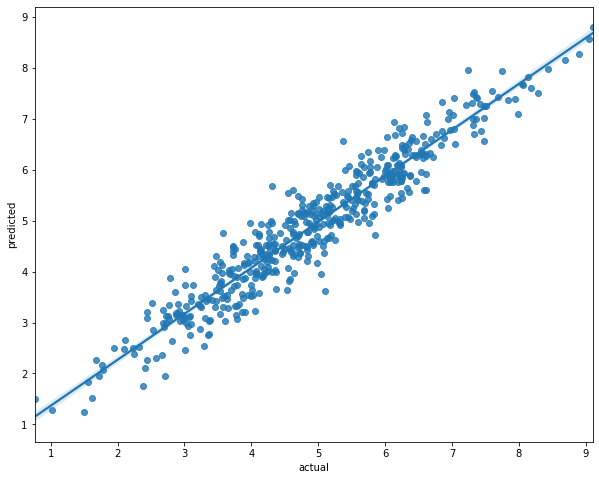

In [161]:
plt.figure(figsize=(10,8))
sns.regplot(pred.actual,pred.predicted)

LASSO Regression and Ridge Regression

In [165]:
rid = Ridge()
las=Lasso()

In [166]:
param = {'alpha' : [0.1,0.2,0.5,1.0,1.2,1.5],
        'solver' : ['auto', 'svd']}

In [170]:
rand_cv=RandomizedSearchCV(rid,param_distributions=param,cv=10,scoring='r2',n_jobs=1,n_iter=10)

In [171]:
rand_cv


RandomizedSearchCV(cv=10, estimator=Ridge(), n_jobs=1,
                   param_distributions={'alpha': [0.1, 0.2, 0.5, 1.0, 1.2, 1.5],
                                        'solver': ['auto', 'svd']},
                   scoring='r2')

In [172]:
rand_cv.fit(x,y)

RandomizedSearchCV(cv=10, estimator=Ridge(), n_jobs=1,
                   param_distributions={'alpha': [0.1, 0.2, 0.5, 1.0, 1.2, 1.5],
                                        'solver': ['auto', 'svd']},
                   scoring='r2')

In [173]:
rand_cv.best_estimator_

Ridge(alpha=1.2, solver='svd')

In [174]:
rand_cv.best_params_

{'solver': 'svd', 'alpha': 1.2}

In [175]:
rand_cv.best_score_

0.9173793597963801

In [ ]:
rand_cv.refit()

In [177]:
rid=rid.set_params(**rand_cv.best_params_)

In [178]:
rid

Ridge(alpha=1.2, solver='svd')

In [180]:
rid.fit(x_train,y_train)

Ridge(alpha=1.2, solver='svd')

In [181]:
r2_score(y_test , rid.predict(x_test))

0.9138603698835939